# Data Scientist Professional Practical Exam Submission
------------------------------

# Report: Predicting Popular Recipes for Website Homepage

# Introduction

In this notebook, we have been tasked with helping select popular recipes to display on the homepage in order to increase website traffic and subscriptions. The current method of selecting recipes based on personal preference has led to inconsistent results. To address this, we developed a machine learning model in order to standardize results and ensure better recipe selection.

# Importing Libraries

Our dataset has 947 rows, with 7 different features or columns.

In [218]:
# tabular data processing
import pandas as pd
# linear algebra
import numpy as np
# data viz
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
# loading data into workspace and some quick exploration
df = pd.read_csv('recipe_site_traffic_2212.csv',index_col='recipe')
print(df.shape)
df.head(10)

(947, 7)


,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,NaN
6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NaN
9,538.52,3.78,3.37,3.79,Pork,6,High


In [220]:
# checking out the data types for each column which we later use to validate against
df.dtypes

calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

# Data Validation

## Data Type Validation

### Adjusting Column Types

When looking at the data types for each column, we see that 'servings' is of type object when it should be numeric. In addition, high_traffic should be of type character.

In [221]:
# changing servings to numeric and replacing string values
df['servings'] = df['servings'].replace(' as a snack', '', regex=True)
df['servings'] = df['servings'].astype('int')

Converting the appropriate columns to type category.

In [222]:
df['category'] = df['category'].astype('category')
df['high_traffic'] = df['high_traffic'].astype('category')

Filling in missing values with 'Low' since when the data was populated, not all recipes were marked with a traffic status.

In [223]:
# fixing high_traffic
print(df['high_traffic'].value_counts())
df['high_traffic'] = df['high_traffic'].cat.add_categories('Low')
df["high_traffic"] = df["high_traffic"].fillna('Low')
df.rename(columns={'high_traffic': 'traffic'}, inplace=True)
print(df['traffic'].value_counts())

High    574
Name: high_traffic, dtype: int64
High    574
Low     373
Name: traffic, dtype: int64


Now all data types correspond to the criteria listed in the instructions and we're ready for the next step!

In [224]:
df.dtypes

calories         float64
carbohydrate     float64
sugar            float64
protein          float64
category        category
servings           int64
traffic         category
dtype: object

### Handling Duplicate Values

After dropping duplicate values, the rows of our dataset decreased by 23, meaning that there were 23 duplicate values.

In [225]:
# dropping duplicates in our dataset so all observation are given equal weight
df.drop_duplicates(inplace=True)
df.shape

(924, 7)

### Handling Missing Data

Missing values in this dataset make up a small amount of the total percentage of the entire dataset, but it is still significant enough where we shouldn't just drop them out. Instead we will impute values onto them.

In [226]:
# getting counts of missing data for each column as a percentage of the dataset
df.isnull().sum() / len(df)

calories        0.031385
carbohydrate    0.031385
sugar           0.031385
protein         0.031385
category        0.000000
servings        0.000000
traffic         0.000000
dtype: float64

In order to decide what statistical measure we will use to impute onto the missing values, we are looking at the variance, mean, and median of the dataset.

In [227]:
df.describe()

,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,924.000000
mean,435.939196,35.069676,9.046547,24.149296,3.457792
std,453.020997,43.949032,14.679176,36.369739,1.739028
min,0.140000,0.030000,0.010000,0.000000,1.000000
25%,110.430000,8.375000,1.690000,3.195000,2.000000
50%,288.550000,21.480000,4.550000,10.800000,4.000000
75%,597.650000,44.965000,9.800000,30.200000,4.000000
max,3633.160000,530.420000,148.750000,363.360000,6.000000


We will impute the median value for each column onto the columns with missing values since there is a huge difference between the lowest value and highest value for each column. This will decrease bias in our dataset.

In [228]:
df['calories'].fillna(df['calories'].median(),inplace=True)
df['carbohydrate'].fillna(df['carbohydrate'].median(),inplace=True)
df['sugar'].fillna(df['sugar'].median(),inplace=True)
df['protein'].fillna(df['protein'].median(),inplace=True)

In [229]:
# now checking the number of missing values
df.isnull().sum()

calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
traffic         0
dtype: int64

### Handling Outliers

We handled outliers using the IQR method and visualized the data distribution for numerical values. It's important to note that there are no outliers in categorical values. Outliers, which represent rare deviations from typical data points, are shown in the graph outside the box:

In [230]:
data_bef = df.copy()
# Handling Outliers
def handle_outlier(df,col):
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

data_num = df.select_dtypes(include = ["float64", "int64"])

for column in data_num.columns:
    handle_outlier(df, column)


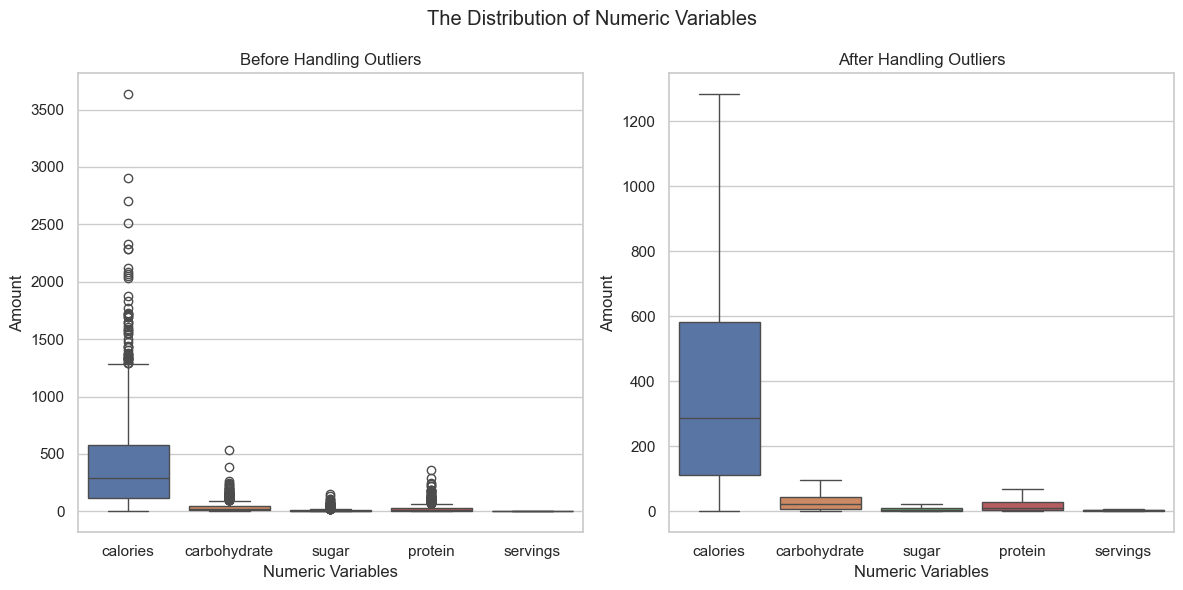

In [250]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data_bef,ax=axes[0])
sns.boxplot(df,ax=axes[1])
axes[0].set_title("Before Handling Outliers")
axes[1].set_title("After Handling Outliers")
fig.suptitle("The Distribution of Numeric Variables")
axes[0].set_xlabel("Numeric Variables")
axes[1].set_xlabel("Numeric Variables")
axes[0].set_ylabel("Amount")
axes[1].set_ylabel("Amount")
plt.tight_layout()
plt.show()

When looking at these graphs, it is clear that our data has a right skew and that handling outliers helps to normalize our dataset.

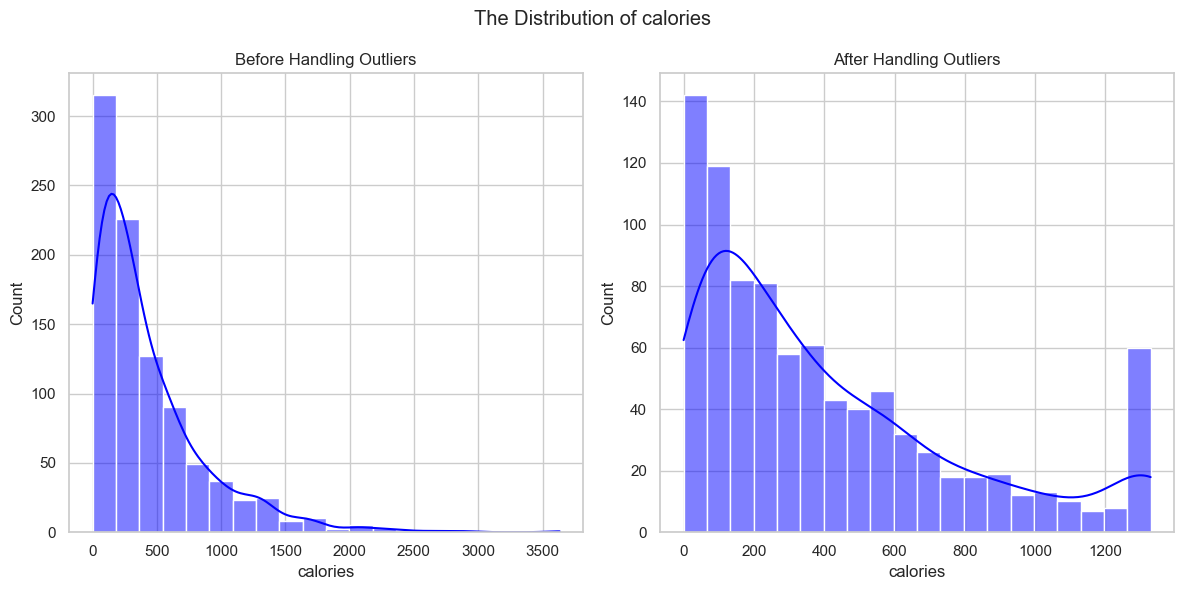

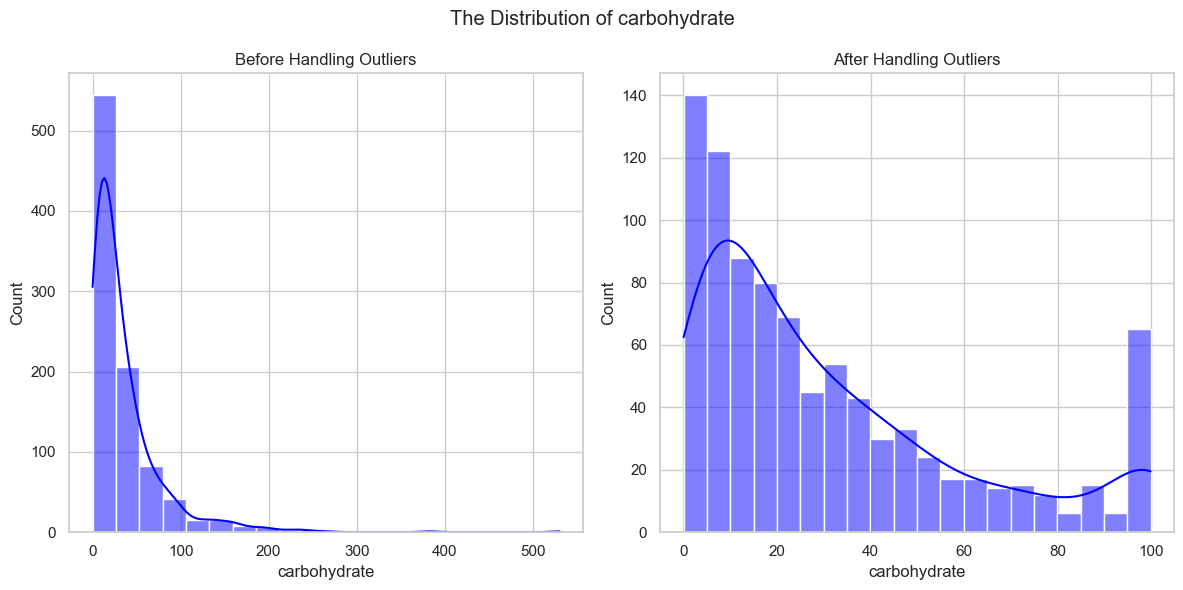

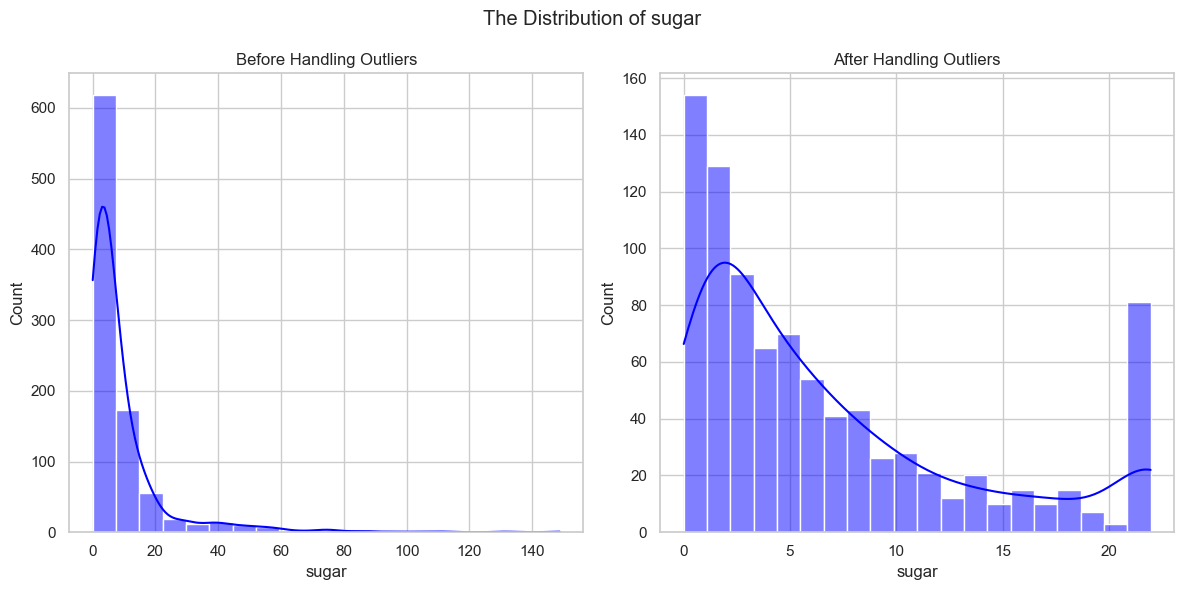

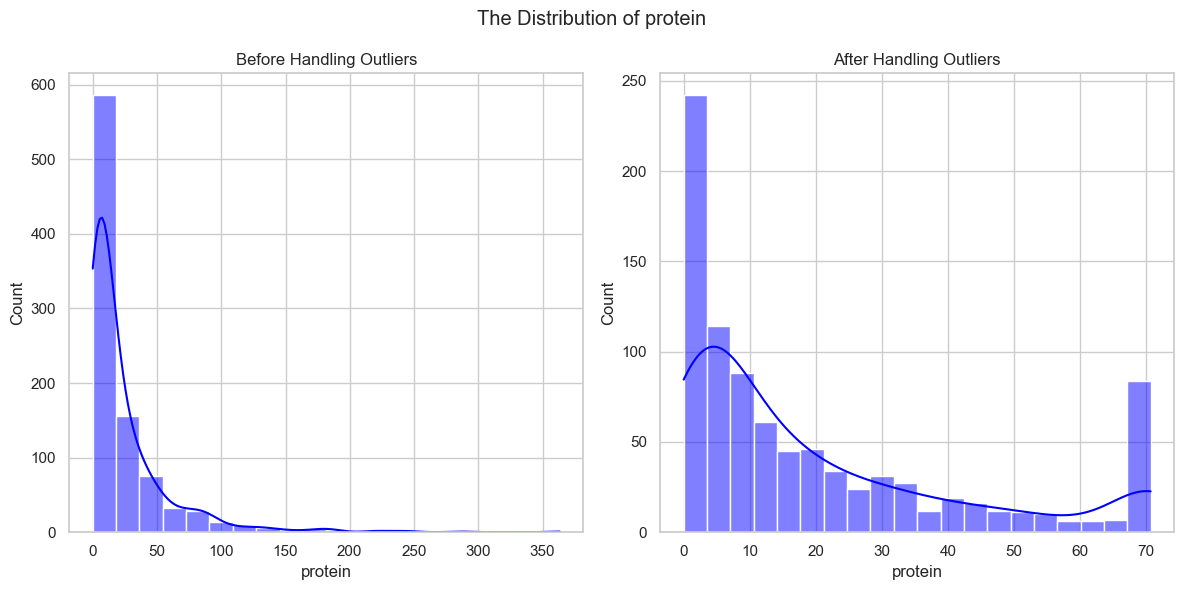

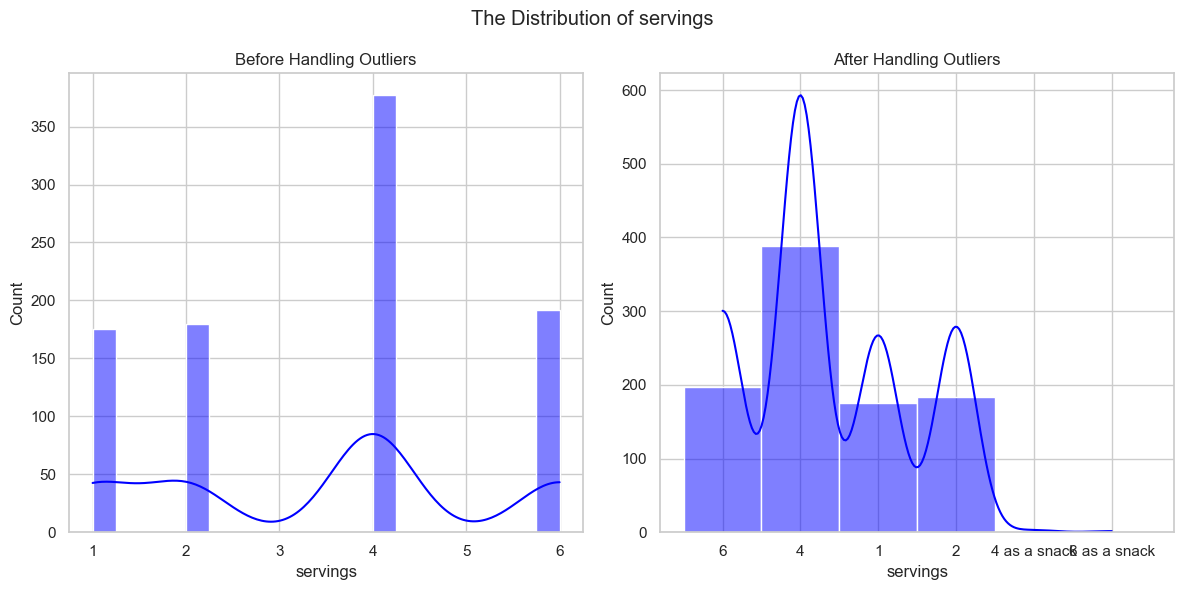

In [232]:
data_num = df.select_dtypes(include = ["float64", "int64"])
for col in data_num.columns:
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  sns.histplot(data_bef[col], kde=True, color='blue',ax=axes[0], bins=20)
  sns.histplot(df[col], kde=True, color='blue',ax=axes[1], bins=20)
  axes[0].set_title("Before Handling Outliers")
  axes[1].set_title("After Handling Outliers")
  fig.suptitle('The Distribution of '+col)
  plt.tight_layout()
  plt.show()

The last thing we will do in this part is transform our data

# Exploratory Analysis

In [233]:
# printing out a subset of our dataset as a reference
df.head(7)

,calories,carbohydrate,sugar,protein,category,servings,traffic
recipe,,,,,,,
1,288.55,21.48,4.55,10.80,Pork,6.0,High
2,35.48,38.56,0.66,0.92,Potato,4.0,High
3,914.28,42.68,3.09,2.88,Breakfast,1.0,Low
4,97.03,30.56,21.24,0.02,Beverages,4.0,High
5,27.05,1.85,0.80,0.53,Beverages,4.0,Low
6,691.15,3.46,1.65,53.93,One Dish Meal,2.0,High
7,183.94,47.95,9.75,46.71,Chicken Breast,4.0,Low


Since our goal of this notebook is to optimize website traffic, the 'traffic' column is our target variable and will be what we're most interested in.

Let's take a look at the class balance in the 'traffic' column!

We see that we have signifcantly more observations with the 'High' label, meaning that we have a class imbalance in our target variable. This could affect the accuracy in our predictions.

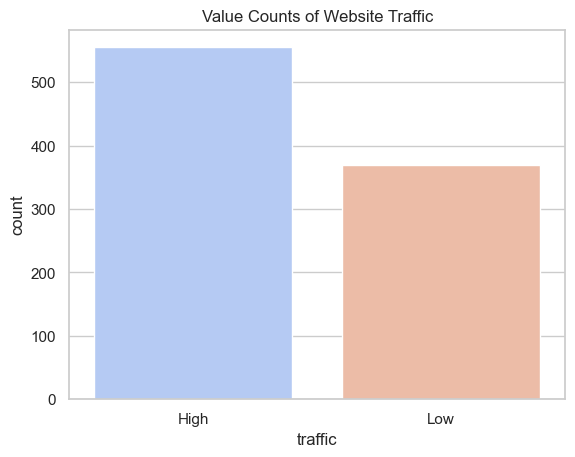

In [234]:
fig = sns.countplot(data=df,x='traffic', palette='coolwarm')
fig.set_title('Value Counts of Website Traffic')
plt.show()

We are also interested how the recipe categories are related and their distribution. Let's check it out!

The class labels are fairly even amoung categories.

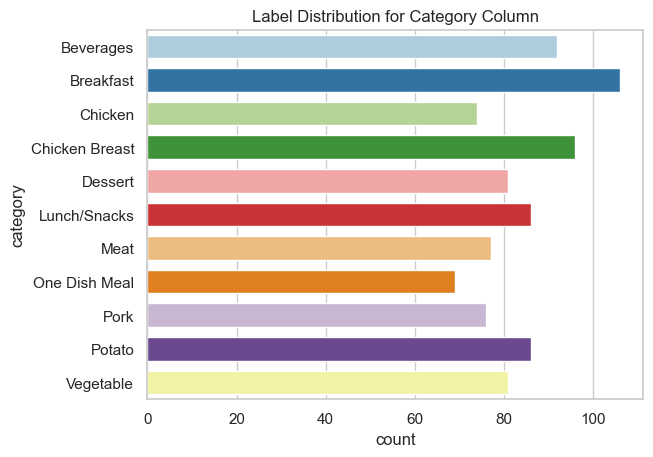

In [235]:
fig = sns.countplot(data=df['category'],width=.7,palette='Paired')
fig.set_title('Label Distribution for Category Column')
plt.show()

Now let's map traffic column onto this graph!

This clearly shows that some categories, such as Vegetable, Potato, Pork, One Dish Meal, and Meat, are significantly more popular than other categories. This could mean that these if a recipe is in this category, it can indicate if it will be popular!

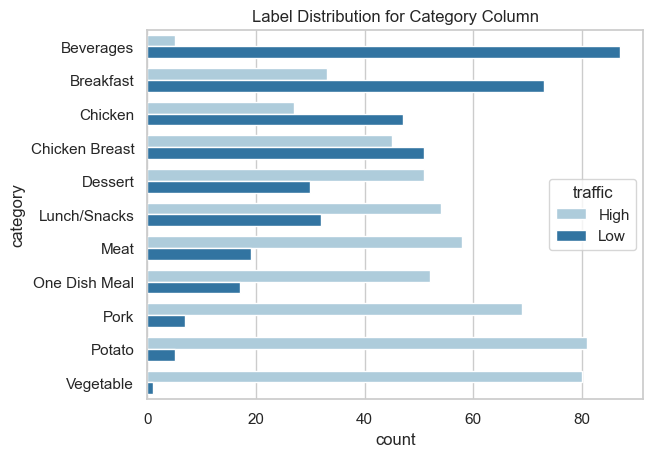

In [236]:
fig = sns.countplot(data=df,y='category',hue='traffic',width=.7,palette='Paired')
fig.set_title('Label Distribution for Category Column')
plt.show()

Finally, let's look at some plots between our numeric variables with traffic quality mapped onto them!

From this pairplot, it is difficult to determine an exact relationship between the target variable and numeric features. This could indicate that the numerical features don't influence the target variable.

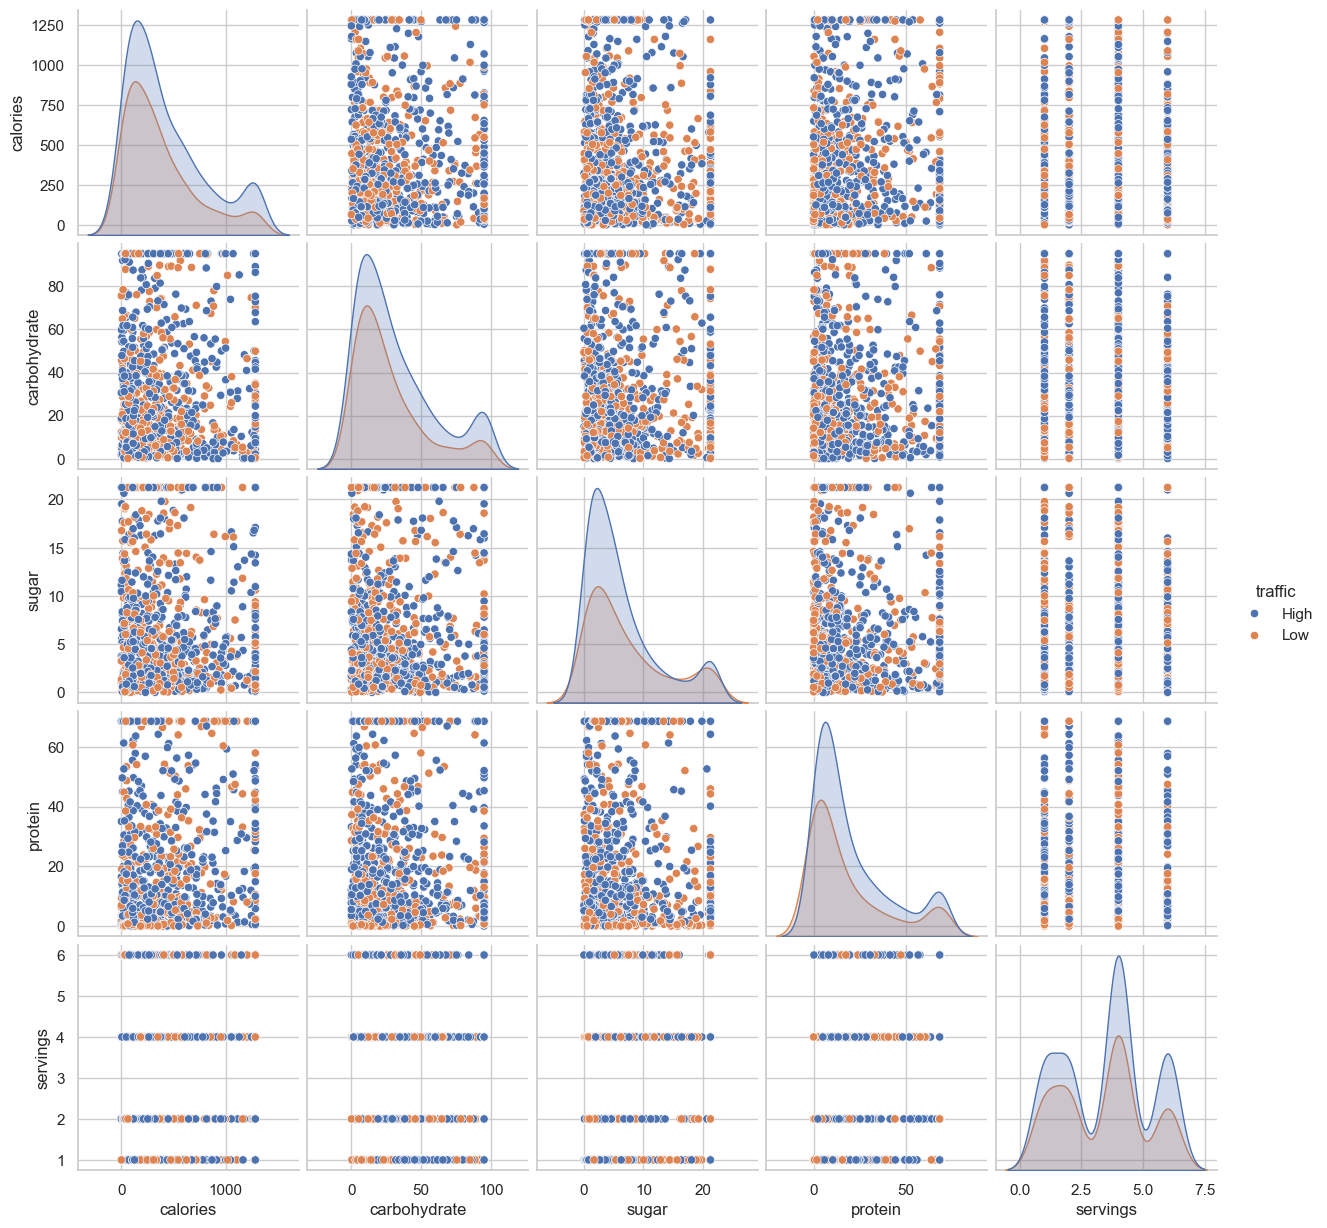

In [237]:
pair_plot = sns.pairplot(data=df, hue="traffic")
plt.show()

# Model Development

When trying to predict our target variable, we will be trying to do binary classification. In addition, we also have labels for our model to use, meaning that this is a supervised machine learning problem. Therefore, we can use a binary classification supervised model. Some examples of these would be, **Binary Random Forest Classifier** or **Binary Logistic Regression classification**.

We will use the **Logistic Regression model** as the baseline for this task due to it's relative simplicity and fast training. Then we will use the **Random Forest model** as a comparision due to its ensemble training nature.

In [238]:
# importing necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Modifying Features

We will be encoding our categorical features so that we can use them during our classification. In addition, we will be scaling our features so that all numerical features will be given the same weight, instead of simply larger numbers getting more value. These two measures will decrease bias in our dataset and improve the accuracy of our models.

In [239]:
# encoding features, AKA transforming categorical features into numeric
df_dummies = pd.get_dummies(df)

# manually dropping columns so we can keep traffic_High
df_dummies.drop(['traffic_Low','category_Vegetable'],axis=1,inplace=True)
df_dummies

,calories,carbohydrate,sugar,protein,servings,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,traffic_High
recipe,,,,,,,,,,,,,,,,
1,288.55,21.48,4.55,10.80,6.0,0,0,0,0,0,0,0,0,1,0,1
2,35.48,38.56,0.66,0.92,4.0,0,0,0,0,0,0,0,0,0,1,1
3,914.28,42.68,3.09,2.88,1.0,0,1,0,0,0,0,0,0,0,0,0
4,97.03,30.56,21.24,0.02,4.0,1,0,0,0,0,0,0,0,0,0,1
5,27.05,1.85,0.80,0.53,4.0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,186.21,83.94,1.98,22.40,4.0,0,0,0,1,0,0,0,0,0,0,1
943,1161.00,5.31,21.24,44.22,2.0,0,0,0,0,0,1,0,0,0,0,0
945,951.74,29.42,3.57,13.87,2.0,0,0,0,0,0,0,0,0,1,0,1


#### Adding a STD column

Adding a column depicted the standard deviation will help with our results

In [240]:
columns_to_std = ['calories','carbohydrate', 'sugar', 'protein']

df_dummies['std'] = df_dummies[columns_to_std].apply(lambda row: np.std(row), axis=1)

#### Scaling Features

In [241]:
# creating scaler object
scaler = StandardScaler()

# selecting all number features
numerical_cols = df.select_dtypes('number').columns

# fit and transform the scaler on the numerical features
df_dummies[numerical_cols] = scaler.fit_transform(df_dummies[numerical_cols])
df_dummies

,calories,carbohydrate,sugar,protein,servings,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,traffic_High,std
recipe,,,,,,,,,,,,,,,,,
1,-0.322978,-0.323645,-0.336886,-0.413687,1.462647,0,0,0,0,0,0,0,0,1,0,1,119.782928
2,-1.012920,0.290985,-0.946083,-0.876246,0.311957,0,0,0,0,0,0,0,0,0,1,1,18.147933
3,1.382941,0.439245,-0.565530,-0.784483,-1.414079,0,1,0,0,0,0,0,0,0,0,0,389.210353
4,-0.845117,0.003102,2.276867,-0.918382,0.311957,1,0,0,0,0,0,0,0,0,0,1,36.265658
5,-1.035902,-1.030039,-0.924158,-0.894505,0.311957,1,0,0,0,0,0,0,0,0,0,0,11.264798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,-0.601987,1.924002,-0.739363,0.129399,0.311957,0,0,0,1,0,0,0,0,0,0,1,71.656800
943,2.055570,-0.905529,2.276867,1.150961,-0.838734,0,0,0,0,0,1,0,0,0,0,0,492.707167
945,1.485068,-0.037921,-0.490360,-0.269957,-0.838734,0,0,0,0,0,0,0,0,1,0,1,405.456285


#### Splitting Data 

Splitting our data into X, y. This way we will be able to feed our features into our model and our target variable so our model and learn and generalize.

In [242]:
X = df_dummies.drop('traffic_High',axis=1)
y = df_dummies['traffic_High']

In [243]:
# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

## Fitting Logistic Regression Model

In [244]:
# creating model
model = LogisticRegression(penalty='l2',C=7)

# fitting model
model.fit(X_train,y_train)

# getting predictions
y_pred_model= model.predict(X_test)

## Fitting Random Forest Model

In [245]:
# creating model
comparison = RandomForestClassifier(n_estimators=12,min_samples_split=3, random_state=42)

# fitting model
comparison.fit(X_train,y_train)

# getting predictions
y_pred_comparison = comparison.predict(X_test)

# Model Evaluation

For the evaluation process, we chose Precision, Recall and F1 Score. Precision measures the percentage of true positives among retrieved positives, recall measures the percentage of true negatives among retrieved negatives, while F1 Score is a harmonic mean of precision and recall. In addition, we will look at confusion matrices and classification reports to see how our model predicts values.

In [246]:
# importing score metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report

## Evaluating Logistic Regression Model

Our model preforms somewhat okay, it is a good start, however it doesn't meet the specificied 80% f1 score mark. Let's compare it to the Random Forest Model.

In [247]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_model))
print("Classification report:\n", classification_report(y_test, y_pred_model))

Confusion Matrix:
 [[43 22]
 [28 92]]
Classification report:
               precision    recall  f1-score   support

           0       0.61      0.66      0.63        65
           1       0.81      0.77      0.79       120

    accuracy                           0.73       185
   macro avg       0.71      0.71      0.71       185
weighted avg       0.74      0.73      0.73       185



## Evaluating Random Forest Model

In [248]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_comparison))
print("Classification report:\n", classification_report(y_test, y_pred_comparison))

Confusion Matrix:
 [[38 27]
 [31 89]]
Classification report:
               precision    recall  f1-score   support

           0       0.55      0.58      0.57        65
           1       0.77      0.74      0.75       120

    accuracy                           0.69       185
   macro avg       0.66      0.66      0.66       185
weighted avg       0.69      0.69      0.69       185



### **Conclusion:**

Precision, Recall and F1 Score of High traffic by the Logistic Regression model are 0.74, 0.73, 0.73, and by Random Forest Classification model are 0.69, 0.69, 0.69. That means the Logistic Regression model fits the features slightly better and has less error in predicting values.

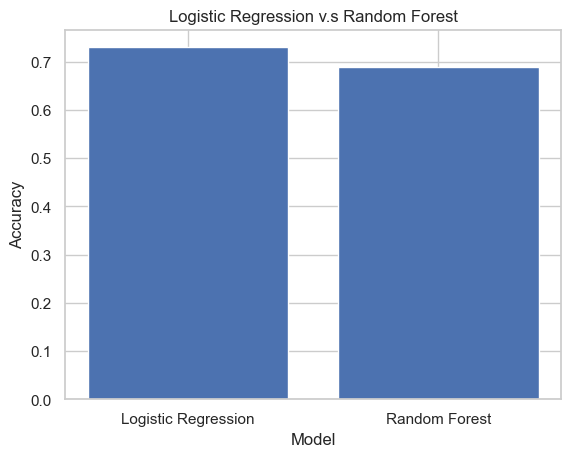

In [249]:
model1_accuracy =  0.73
model2_accuracy = 0.69

model_names = ['Logistic Regression', 'Random Forest']
x = range(len(model_names))
accuracies = [model1_accuracy, model2_accuracy]
plt.bar(x, accuracies, tick_label=model_names)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Logistic Regression v.s Random Forest')
plt.show()

# Business Metrics

## Business Goals
- Predict which recipes will lead to high traffic.
- Correctly predict high traffic recipes 80% of the time.


**Has our model accomplished these goals?**
- While our model is still approaching 80% accuracy on the recipe data, it is likely just a few slight tweaks would accomplish this. In addition, our model does accomplish the first goal, since it is able to predict which recipes will lead to high traffic with our **Logistic Regression** modeling hitting **73%** accuracy.
- The only way to compare our model preformance to this business is to analyize the said models ability to classify if a recipe will gather high or low traffic. This is the KPI (Key Preformance Indicator) the company should be looking at.

## Recommendations
To help Product Manager predict the high traffic of the recipes, we can deploy this Logistic Regression model into production. By implementing this model, about 73% of the prediction will make sure the traffic will be high. This will help Product Manager build their confidence in generating more traffic to the rest of the website.

In addition, I suggest that by securing a larger dataset, reducing skew and bias in the data, and additional hyper-parameter tuning / feature engineering, we will be able to train a model that preforms even better.

### To implement and improve the model, we should consider the following steps:

- Deployment Strategy:Consider deploying it on edge devices for convenience and security, and test the model with newly hired product analysts.
- Regular Model Retraining: Implement a system for regular model retraining to ensure out model doesn't expierence drag and remains relavent. As user preferences may change over time, it is essential to keep the model up-to-date with the latest data to maintain its predictive accuracy.
- Collect More Data: e.g. time to make, cost per serving, ingredients, site duration time (how long users were at the recipe page), income links (from what sites users came to the recipe page), combinations of recipes (what recipes user visited at the same session with the current recipe). This should be done in addition to expanding the amount of exisiting data collected.
- Balance Data Categories: The dataset contains a class imbalance between low and high-traffic recipes. To address this issue, we suggest collecting additional data for the minority class (low-traffic recipes) or applying data augmentation techniques to balance the dataset.